In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

data = pd.read_csv('yonelimfinal.csv', sep=';', encoding='utf-8')

os.makedirs('histograms', exist_ok=True)
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

for i in range(1, 11):
    column_name = f'soru{i}'
    column_folder = f'histograms/{column_name}'
    os.makedirs(column_folder, exist_ok=True)
    
    grouped_data = data.groupby('Yas')[column_name].apply(lambda x: (x == 'Evet').mean()).sort_values(ascending=True)
    
    plt.figure(figsize=(10, 6))

    grouped_data.plot(kind='bar', color=colors[i-1])
    plt.xlabel('Age Range')
    plt.ylabel('Frequency')
    plt.title(f'Number of "Yes" Answers in Each Age Range, Question {i}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'{column_folder}/yas{i}.png')
    plt.close()


In [2]:
for i in range(1, 11):
    column_name = f'soru{i}'
    column_folder = f'histograms/{column_name}'
    os.makedirs(column_folder, exist_ok=True)
    
    grouped_data = data.groupby('Bolge')[column_name].apply(lambda x: (x == 'Evet').mean()).sort_values(ascending=True)
    
    plt.figure(figsize=(10, 6))

    grouped_data.plot(kind='bar', color=colors[i-1])
    plt.xlabel('Areas')
    plt.ylabel('Frequency')
    plt.title(f'Number of "Yes" Answers based on each Area, Question {i}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'{column_folder}/bolge{i}.png')
    plt.close()


In [3]:
for i in range(1, 11):
    column_name = f'soru{i}'
    column_folder = f'histograms/{column_name}'
    os.makedirs(column_folder, exist_ok=True)
    
    grouped_data = data.groupby('Egitim')[column_name].apply(lambda x: (x == 'Evet').mean()).sort_values(ascending=True)
    
    plt.figure(figsize=(10, 6))

    grouped_data.plot(kind='bar', color=colors[i-1])
    plt.xlabel('Education level')
    plt.ylabel('Frequency')
    plt.title(f'Number of "Yes" Answers in Each Education Level, Question {i}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'{column_folder}/egitim{i}.png')
    plt.close()

In [4]:
for i in range(1, 11):
    column_name = f'soru{i}'
    column_folder = f'histograms/{column_name}'
    os.makedirs(column_folder, exist_ok=True)
    
    grouped_data = data.groupby('Cinsiyet')[column_name].apply(lambda x: (x == 'Evet').mean()).sort_values(ascending=True)
    
    plt.figure(figsize=(10, 6))

    grouped_data.plot(kind='bar', color=colors[i-1])
    plt.xlabel('Sex')
    plt.ylabel('Frequency')
    plt.title(f'Number of "Yes" Answers based on sex, Question {i}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'{column_folder}/cinsiyet{i}.png')
    plt.close()

In [5]:
for i in range(1, 11):
    column_name = f'soru{i}'
    column_folder = f'histograms/{column_name}'
    os.makedirs(column_folder, exist_ok=True)
    
    grouped_data = data.groupby('parti')[column_name].apply(lambda x: (x == 'Evet').mean()).sort_values(ascending=True)
    
    plt.figure(figsize=(10, 6))

    grouped_data.plot(kind='bar', color=colors[i-1])
    plt.xlabel('Political party')
    plt.ylabel('Frequency')
    plt.title(f'Number of "Yes" Answers in Each political party, Question {i}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'{column_folder}/parti{i}.png')
    plt.close()

In [12]:
import pandas as pd

data = pd.read_csv('yonelimfinal.csv', sep=';', encoding='utf-8')

question_columns = ['soru1', 'soru2', 'soru3', 'soru4', 'soru5', 'soru6', 'soru7', 'soru8', 'soru9', 'soru10']
data[question_columns] = data[question_columns].replace({'Hayır': 0, 'Evet': 1})
data['Std_Dev'] = data[question_columns].apply(lambda row: row.std(), axis=1)
data['Median'] = data[question_columns].apply(lambda row: row.median(), axis=1)
for column in question_columns:
    data[f'Deviation_{column}'] = data[column].apply(lambda x: 'Above Median' if x == 1 else 'Below Median')


data.to_csv('updated_data.csv', index=False)

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

data = pd.read_csv('yonelimfinal.csv', sep=';', encoding='utf-8')
features = ['Cinsiyet', 'Yas', 'Bolge', 'Egitim', 'soru1', 'soru2', 'soru3', 'soru4', 'soru5', 'soru6', 'soru7', 'soru8', 'soru9', 'soru10']
target = 'parti'

X = data.drop('parti', axis=1)
y = data['parti']

sample_size = 400
data_sample = data.sample(n=sample_size, random_state=42)
X_sample = data_sample.drop('parti', axis=1)
y_sample = data_sample['parti']

X_encoded = pd.get_dummies(X_sample)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_sample, test_size=0.2, random_state=42)

k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.3125


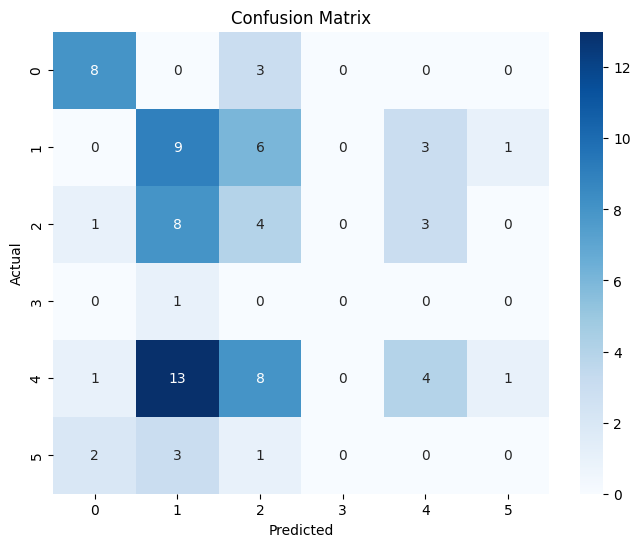

Correct Guesses: 25/80


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

data = pd.read_csv('yonelimfinal.csv', sep=';', encoding='utf-8')

X = data.drop('parti', axis=1)
y = data['parti']

sample_size = 400
data_sample = data.sample(n=sample_size, random_state=42)
X_sample = data_sample.drop('parti', axis=1)
y_sample = data_sample['parti']

X_encoded = pd.get_dummies(X_sample)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_sample, test_size=0.2, random_state=42)

k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

correct_guesses = sum(y_test == y_pred)
total_guesses = len(y_test)
print(f"Correct Guesses: {correct_guesses}/{total_guesses}")
